In [15]:
#####################################################
# ET-robot-contest Game Area Detection and find block color.
# Copyright © 2022 naoki hunada. All rights reserved.
#####################################################

In [16]:
from sklearn.decomposition import PCA
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2

from copy import deepcopy

In [17]:
class option:
    BLOCK_POS = [[150, 12], [288, 150], [150, 288], [12, 150],
        [-1, -1],
        [86, 86], [150, 86], [216, 86],
        [86, 150], [150, 150],
        [86, 216], [150, 216], [216, 216]]
    RED_BLOCK_MIN_THRESHOLD1 = [0, 0, 0] #HSV
    RED_BLOCK_MAX_THRESHOLD1 = [30, 255, 255] #HSV]
    RED_BLOCK_MIN_THRESHOLD2 = [163, 0, 0] #HSV
    RED_BLOCK_MAX_THRESHOLD2 = [179, 255, 255] #HSV
    GREEN_BLOCK_MIN_THRESHOLD = [100, 0, 0] #HSV
    GREEN_BLOCK_MAX_THRESHOLD = [138, 255, 255] #HSV
    BLUE_BLOCK_MIN_THRESHOLD = [45, 0, 0] #HSV
    BLUE_BLOCK_MAX_THRESHOLD = [90, 255, 255] #HSV

In [18]:
### 画像処理 閾値マスク -> 2値化 (hsv)
def img_mask(img, min, max):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hsv_min = np.array(min)
    hsv_max = np.array(max) # |調整箇所|
    mask = cv2.inRange(hsv, hsv_min, hsv_max)
    masked_img = cv2.bitwise_and(img, img, mask=mask)
    mask_gray = cv2.cvtColor(masked_img, cv2.COLOR_BGR2GRAY)
    ret, mask_bit = cv2.threshold(mask_gray, 1, 255, cv2.THRESH_BINARY)
    return mask_bit

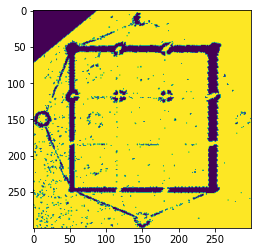

In [22]:
### ブロックの検出 300×300の場合
def detect_block(img, point):
    block_color = [] #0:無, 1:赤, 2:緑, 3:青, 4:黄色
    red_bit1 = img_mask(img, param.RED_BLOCK_MIN_THRESHOLD1, param.RED_BLOCK_MAX_THRESHOLD1)
    red_bit2 = img_mask(img, param.RED_BLOCK_MIN_THRESHOLD2, param.RED_BLOCK_MAX_THRESHOLD2)
    red_bit = red_bit1 | red_bit2
    green_bit = img_mask(img, param.GREEN_BLOCK_MIN_THRESHOLD, param.GREEN_BLOCK_MAX_THRESHOLD)
    blue_bit = img_mask(img, param.BLUE_BLOCK_MIN_THRESHOLD, param.BLUE_BLOCK_MAX_THRESHOLD)
    plt.imshow(np.array(red_bit))

img = cv2.imread("a.png")
param = option()
detect_block(img, 0)

    